In [1]:
from PIL import Image
import numpy as np

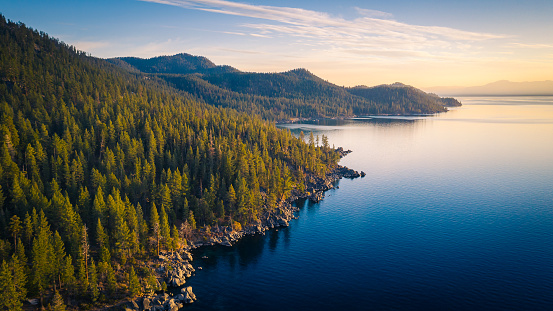

In [2]:
img = Image.open('landscape.jpg')
img

In [3]:
def resetPic():
    return np.array(img)

In [4]:
def getY(pixel):
    return 0.2126*pixel[0]/255 + 0.7152*pixel[1]/255 + 0.0722*pixel[2]/255

In [5]:
def gray(Y):
    return [round(Y*255), round(Y*255), round(Y*255)]

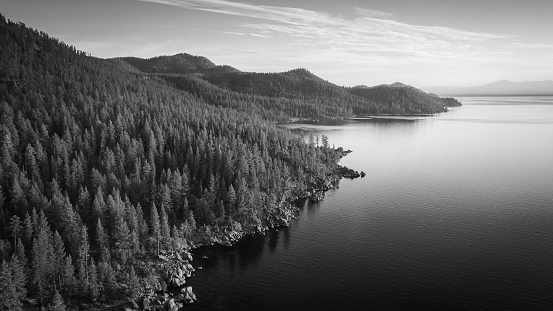

In [6]:
pic = resetPic()
for i in range(len(pic)):
    for j in range(len(pic[i])):
        pic[i][j] = gray(getY(pic[i][j]))
im = Image.fromarray(pic)
im

In [7]:
np.random.seed(34)

In [8]:
def randRGB(Y):
    if Y == 1:
        return [255, 255, 255]
    n = np.random.rand()
    if n < 0.25:
        green = round(255*Y*np.random.rand())
        blue = round(255*(Y-green*0.7152/255)/(1-0.7152)*np.random.rand())
        red = round(255*(Y-green*0.7152/255-blue*0.0722/255)/0.2126)
        if red < 0 or red > 255:
            return randRGB(Y)
    elif 0.25 <= n < 0.5:
        blue = round(255*Y*np.random.rand())
        red = round(255*(Y-blue*0.0722/255)/(1-0.0722)*np.random.rand())
        green = round(255*(Y-red*0.2126/255-blue*0.0722/255)/0.7152)
        if green < 0 or green > 255:
            return randRGB(Y)
    elif n >= 0.5:
        red = round(255*Y*np.random.rand())
        green = round(255*(Y-red*0.2126/255)/(1-0.2126)*np.random.rand())
        blue = round(255*(Y-red*0.2126/255-green*0.7152/255)/0.0722)
        if blue < 0 or blue > 255:
            return randRGB(Y)
    return [red, green, blue]

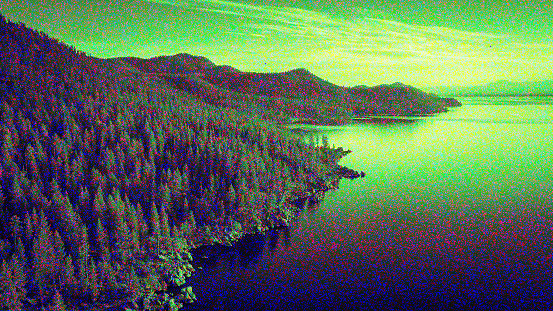

In [9]:
pic = resetPic()
for i in range(len(pic)):
    for j in range(len(pic[i])):
        pic[i][j] = randRGB(getY(pic[i][j]))
im2 = Image.fromarray(pic)
im2

In [12]:
def getYRes(pixel):
    y = 0.2126*pixel[0]/255 + 0.7152*pixel[1]/255 + 0.0722*pixel[2]/255
    return y, abs(255*y-round(255*y))

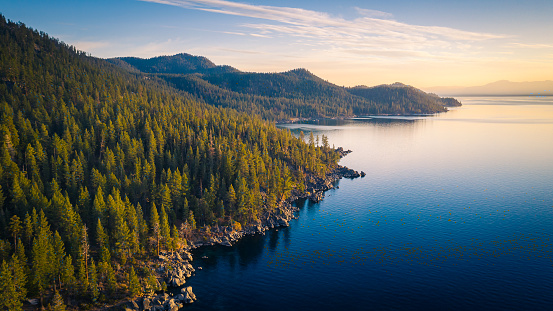

In [13]:
pic = resetPic()
colorAssoc = {}
for i in range(len(pic)):
    for j in range(len(pic[i])):
        y, res = getYRes(pic[i][j])
        if y in colorAssoc.keys():
            if res < colorAssoc[y][0]:
                colorAssoc[y] = (res, pic[i][j])        
        else:
            colorAssoc[y] = (res, pic[i][j])
        
for i in range(len(pic)):
    for j in range(len(pic[i])):
        y2, res2 = getYRes(pic[i][j])
        pic[i][j] = colorAssoc[y2][1]

im2 = Image.fromarray(pic)
im2